In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Data%20Science%20and%20STEM%20Salaries/Levels_Fyi_Salary_Data.csv")

In [5]:
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [6]:
df.shape

(62642, 29)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
totalyearlycompensation,62642.0,216300.373647,138033.746377,10000.0,135000.00,188000.0,264000.00,4980000.0
yearsofexperience,62642.0,7.204135,5.840375,0.0,3.00,6.0,10.00,69.0
yearsatcompany,62642.0,2.702093,3.263656,0.0,0.00,2.0,4.00,69.0
basesalary,62642.0,136687.281297,61369.278057,0.0,108000.00,140000.0,170000.00,1659870.0
stockgrantvalue,62642.0,51486.080733,81874.569391,0.0,0.00,25000.0,65000.00,2800000.0
bonus,62642.0,19334.746588,26781.292040,0.0,1000.00,14000.0,26000.00,1000000.0
cityid,62642.0,9856.201989,6679.104563,0.0,7369.00,7839.0,11521.00,47926.0
dmaid,62640.0,616.097222,289.843390,0.0,506.00,807.0,807.00,881.0
rowNumber,62642.0,41694.723732,24488.865879,1.0,20069.25,42019.0,63021.75,83875.0
Masters_Degree,62642.0,0.245698,0.430504,0.0,0.00,0.0,0.00,1.0


In [10]:
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [11]:
df.isna().sum()

timestamp                      0
company                        5
level                        119
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
otherdetails               22505
cityid                         0
dmaid                          2
rowNumber                      0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
dtype: int64

In [12]:
num_cols = df.select_dtypes(["float64","int64"])
cat_cols = df.select_dtypes(["object"])

for col in num_cols.columns:
    df[col].fillna(df[col].median(), inplace=True)

for col in cat_cols.columns:
    df[col].fillna(df[col].mode().values[0], inplace=True)
df.isna().sum()

timestamp                  0
company                    0
level                      0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
tag                        0
basesalary                 0
stockgrantvalue            0
bonus                      0
gender                     0
otherdetails               0
cityid                     0
dmaid                      0
rowNumber                  0
Masters_Degree             0
Bachelors_Degree           0
Doctorate_Degree           0
Highschool                 0
Some_College               0
Race_Asian                 0
Race_White                 0
Race_Two_Or_More           0
Race_Black                 0
Race_Hispanic              0
Race                       0
Education                  0
dtype: int64

In [14]:
df.duplicated().sum()

0

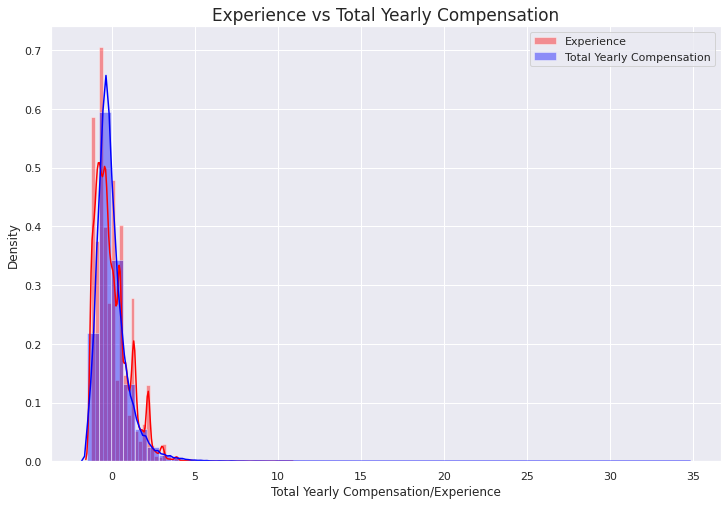

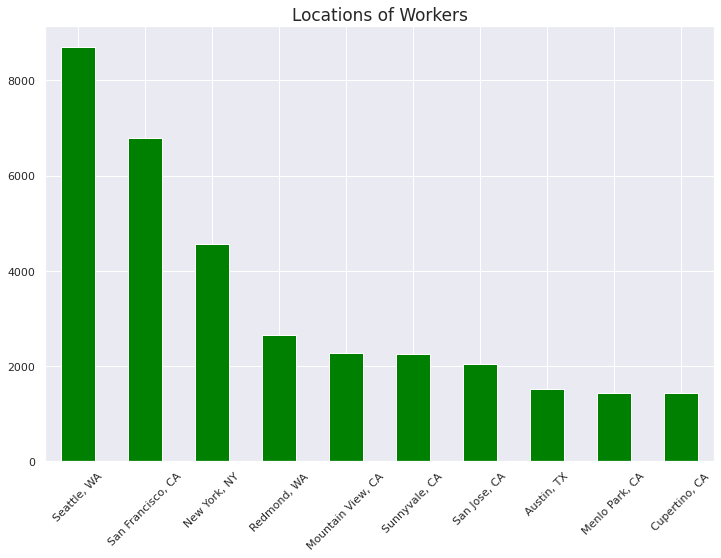

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_df = scaler.fit_transform(df[num_cols.columns])
standardized_df = pd.DataFrame(standardized_df, columns=num_cols.columns)
sns.set_theme()

plt.figure(figsize=(12,8))
sns.distplot(standardized_df["yearsofexperience"], color="red", label="Experience")
sns.distplot(standardized_df["totalyearlycompensation"], color="blue", label="Total Yearly Compensation")
plt.title("Experience vs Total Yearly Compensation", size=17)
plt.xlabel("Total Yearly Compensation/Experience", size=12)
plt.ylabel("Density", size=12)
plt.legend()
plt.show()

plt.figure(figsize=(12,8))
df["location"].value_counts().iloc[:10].plot(kind="bar", color="green")
plt.title("Locations of Workers", size=17)
plt.xticks(rotation=45)
plt.show()

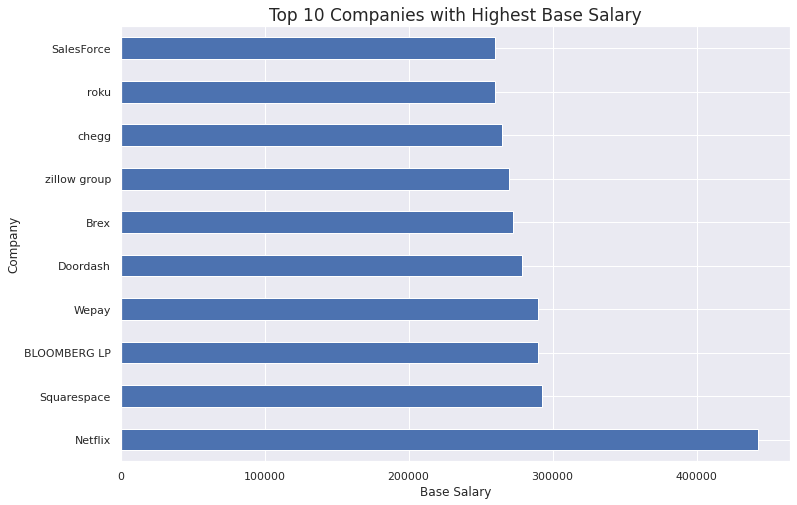

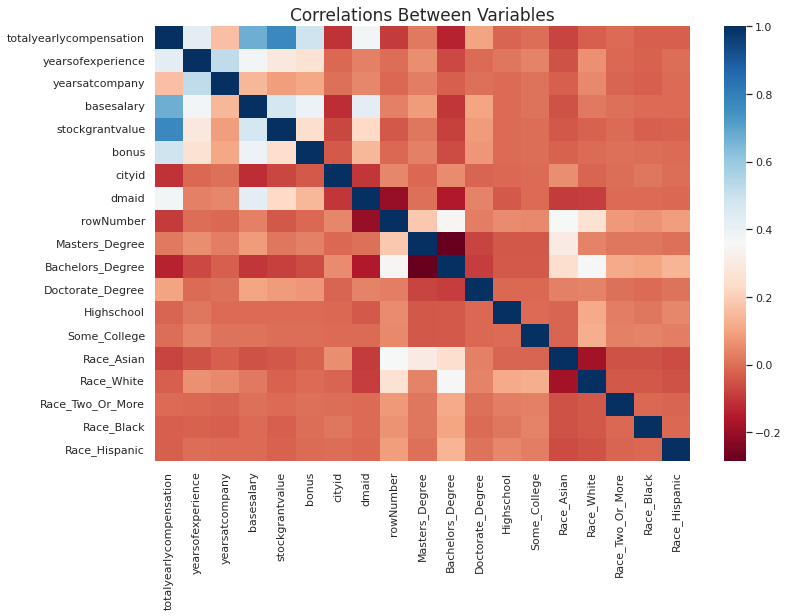

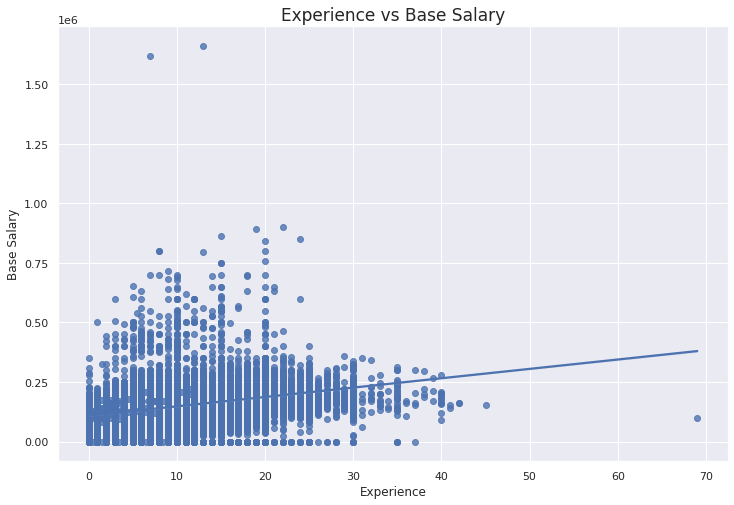

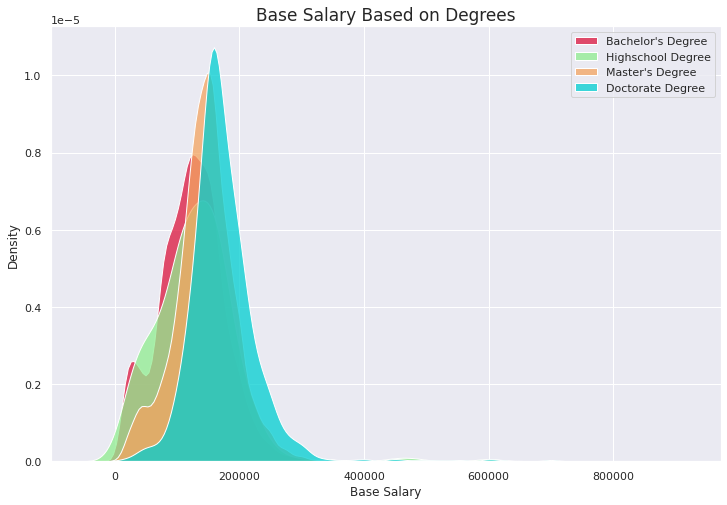

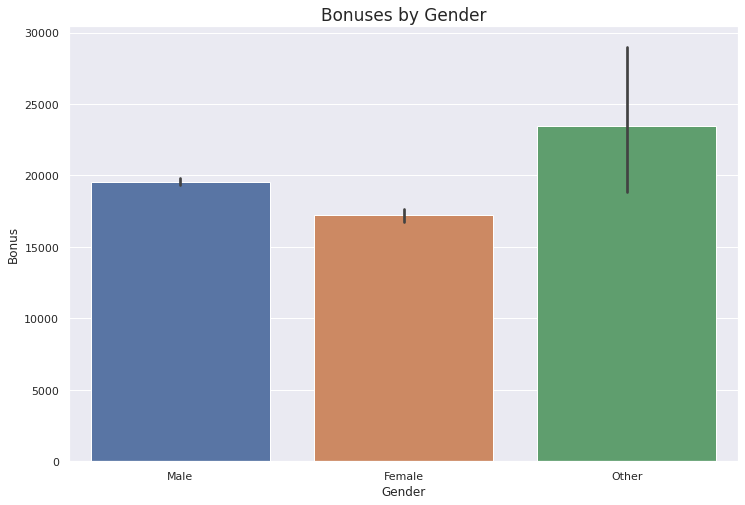

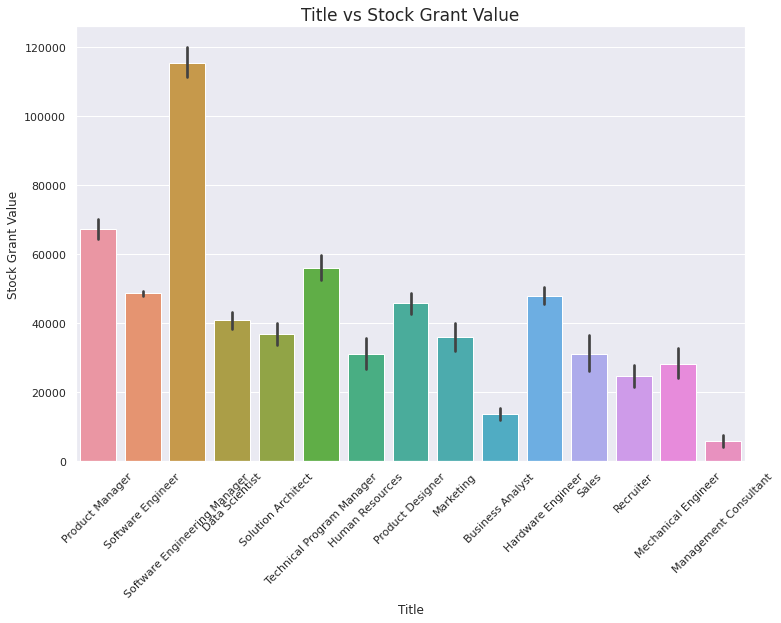

In [16]:
grouped_df_by_company = df.groupby(["company"]).mean()

plt.figure(figsize=(12,8))
grouped_df_by_company.sort_values(by="basesalary", ascending=False).head(10)["basesalary"].plot(kind="barh")
plt.title("Top 10 Companies with Highest Base Salary", size=17)
plt.xlabel("Base Salary", size=12)
plt.ylabel("Company", size=12)
plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=17)
plt.show()

plt.figure(figsize=(12,8))
sns.regplot(x=df["yearsofexperience"], y=df["basesalary"])
plt.title("Experience vs Base Salary", size=17)
plt.xlabel("Experience", size=12)
plt.ylabel("Base Salary", size=12)
plt.show()

plt.figure(figsize=(12,8))
sns.kdeplot(df[df["Bachelors_Degree"]==1]["basesalary"], color="crimson", label="Bachelor's Degree", multiple="stack")
sns.kdeplot(df[df["Highschool"]==1]["basesalary"], color="lightgreen", label="Highschool Degree", multiple="stack")
sns.kdeplot(df[df["Masters_Degree"]==1]["basesalary"], color="sandybrown", label="Master's Degree", multiple="stack")
sns.kdeplot(df[df["Doctorate_Degree"]==1]["basesalary"], color="darkturquoise", label="Doctorate Degree", multiple="stack")
plt.title("Base Salary Based on Degrees", size=17)
plt.xlabel("Base Salary", size=12)
plt.ylabel("Density", size=12)
plt.legend()
plt.show()

plt.figure(figsize=(12,8))
gender_clean_data = df[(df["gender"]=="Male") | (df["gender"]=="Female") | (df["gender"]=="Other")]
sns.barplot(x=gender_clean_data["gender"], y=gender_clean_data["bonus"])
plt.title("Bonuses by Gender", size=17)
plt.xlabel("Gender", size=12)
plt.ylabel("Bonus", size=12)
plt.show()

grantedstock_sorted_df = df.sort_values(by="stockgrantvalue", ascending=False)
grantedstock_sorted_df["title"].unique()

plt.figure(figsize=(12,8))
sns.barplot(x=df["title"], y=df["stockgrantvalue"])
plt.xticks(rotation=45)
plt.title("Title vs Stock Grant Value", size=17)
plt.xlabel("Title", size=12)
plt.ylabel("Stock Grant Value", size=12)
plt.show()